In [24]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 1800px !important; }</style>"))

# <u>CERT x465-003</u>:<br>Week 3 Optional Exercise<br>
![MBA](data/mba-image.jpg)

---

#### Imports

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## `mba_decisions.csv` Dataset Loading and Initial Exploration

In [26]:
mba_df = pd.read_csv('data/mba_decisions.csv')

In [27]:
mba_df

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,33,Female,Economics,3.55,5,Analyst,109172,Yes,524,100,9.2,8.0,Loan,Startup Founder,69000,International,Networking,Online,Yes
9996,9997,30,Female,Business,2.48,5,Manager,82515,Yes,330,362,7.4,8.5,Scholarship,Consultant,131054,Domestic,Entrepreneurship,On-Campus,No
9997,9998,31,Female,Economics,2.86,8,Manager,34152,Yes,681,308,6.8,8.8,Loan,Consultant,100806,Domestic,Networking,On-Campus,Yes
9998,9999,22,Female,Arts,2.30,1,Engineer,61897,No,481,190,5.7,7.7,Self-funded,Marketing Director,115872,International,Networking,Online,Yes


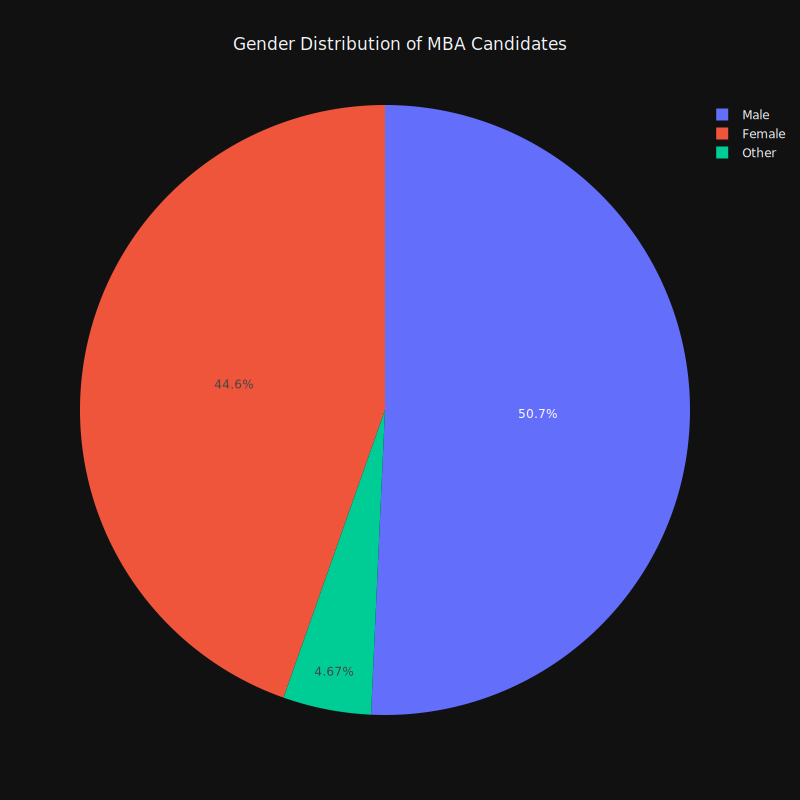

In [28]:
# pie chart
fig = px.pie(mba_df, names='Gender', title='Gender Distribution of MBA Candidates')

fig.update_layout(
    width=800,
    height=800,
    title_x=0.5)

fig.show()

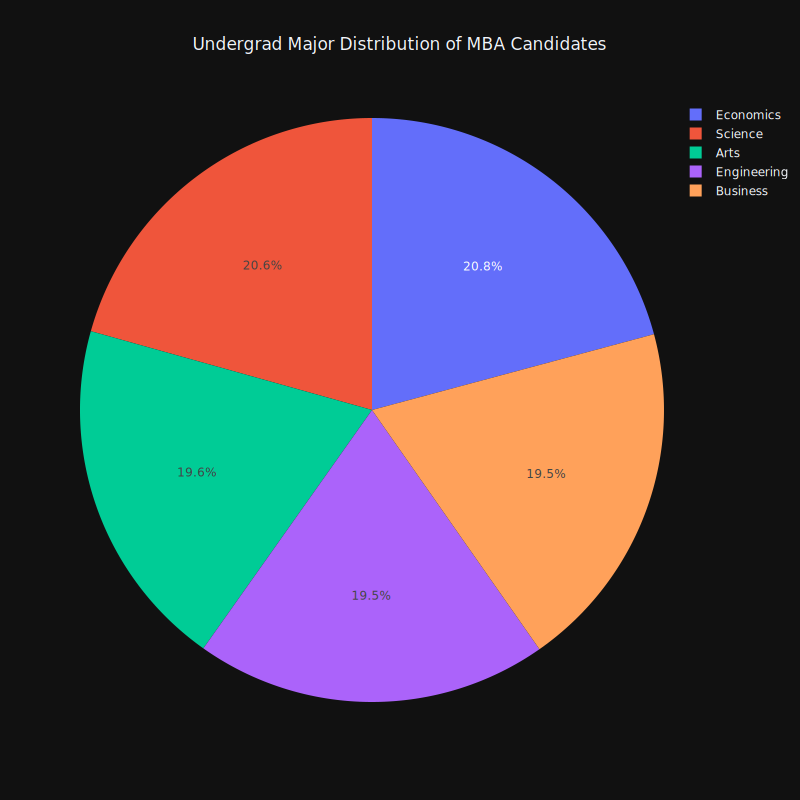

In [29]:
# pie chart
fig = px.pie(mba_df, names='Undergraduate Major', title='Undergrad Major Distribution of MBA Candidates')

fig.update_layout(
    width=800,
    height=800,
    title_x=0.5)

fig.show()

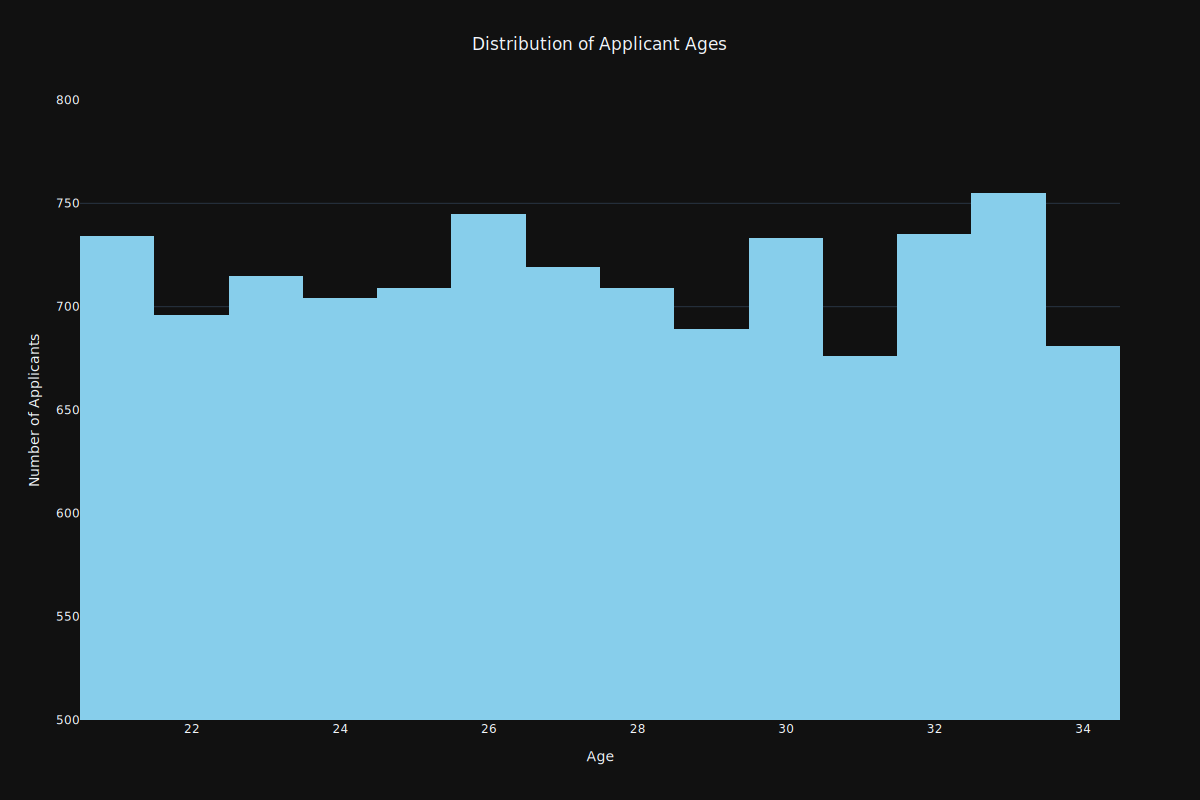

In [30]:
# histogram
fig = px.histogram(
    mba_df,
    x='Age',
    nbins=20,
    title='Distribution of Applicant Ages',
    labels={'Age': 'Age of Applicant'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of Applicants',
    yaxis_range=[500, 800],
    height=800,
    width=1200,
    title_x=0.5
)
fig.show()

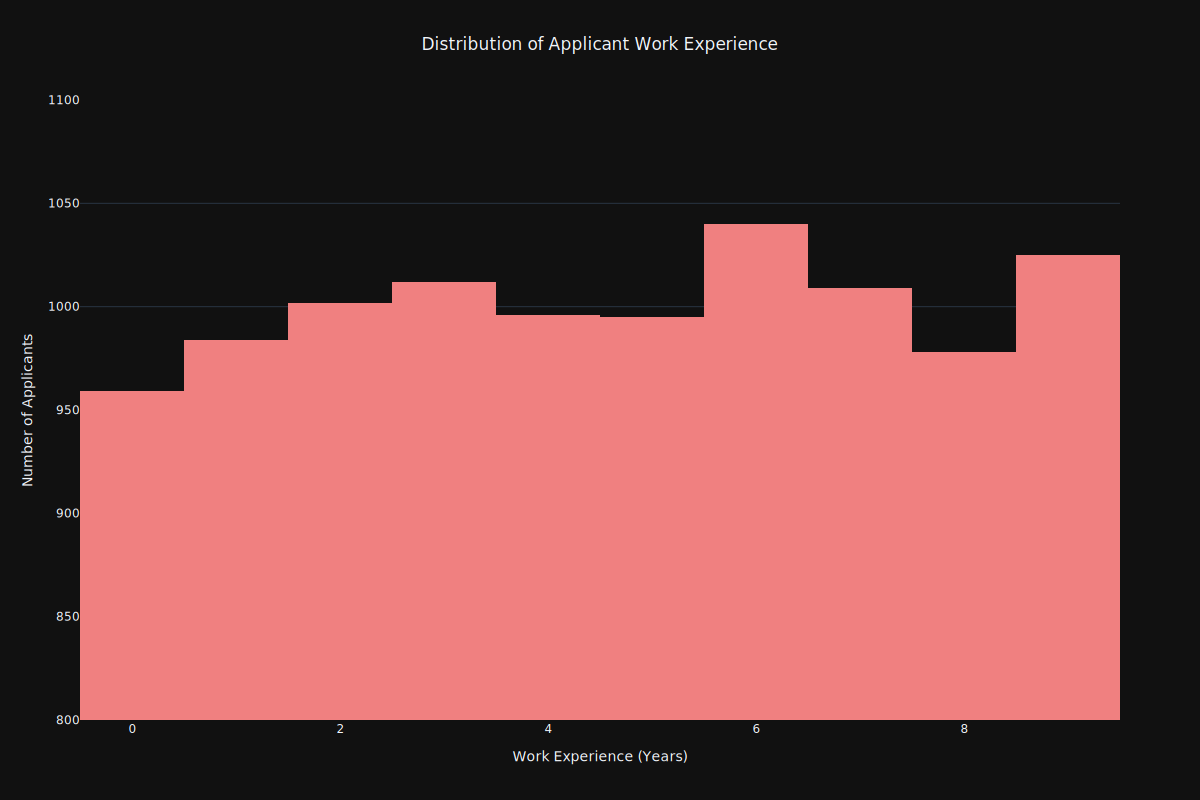

In [31]:
# histogram
fig = px.histogram(
    mba_df,
    x='Years of Work Experience',
    nbins=10,
    title='Distribution of Applicant Work Experience',
    labels={'Work Experience (Years)': 'Years of Work Experience'},
    color_discrete_sequence=['lightcoral']
)

fig.update_layout(
    xaxis_title='Work Experience (Years)',
    yaxis_title='Number of Applicants',
    yaxis_range=[800, 1100],
    height=800,
    width=1200,
    title_x=0.5
)

fig.show()

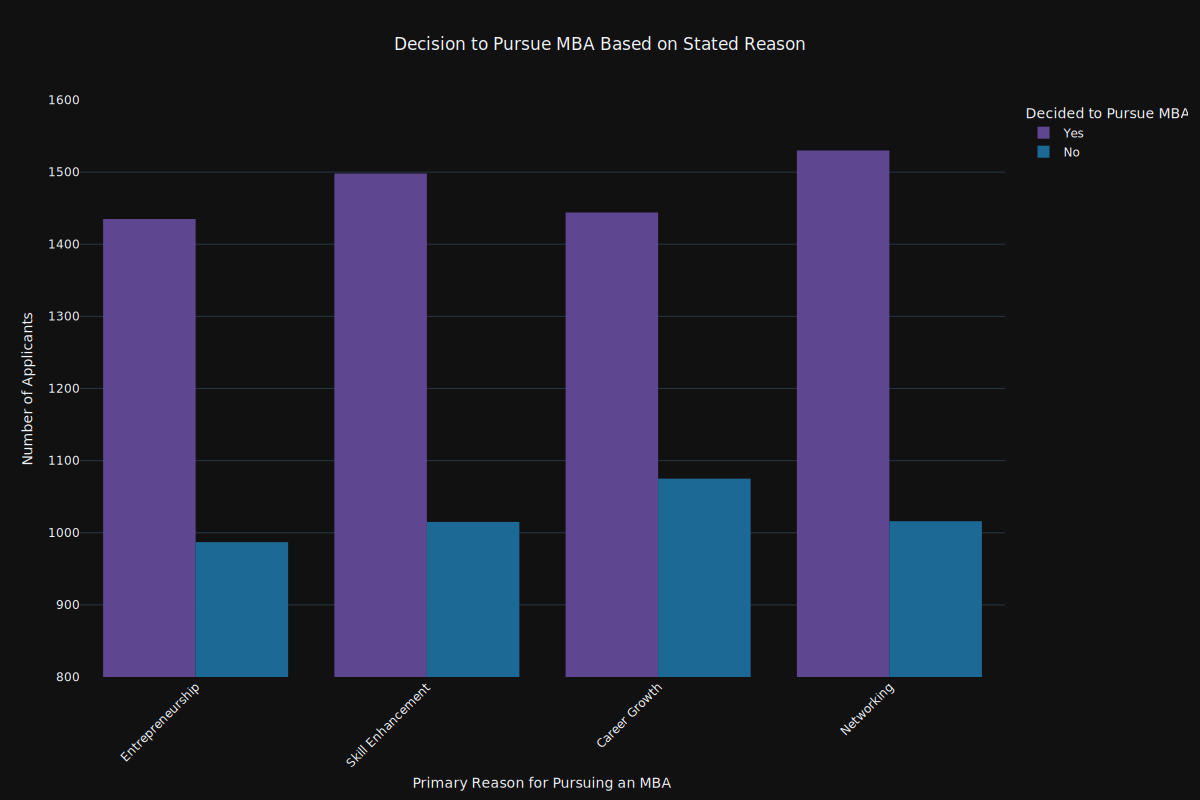

In [32]:
# histogram
fig = px.histogram(
    mba_df,
    x='Reason for MBA',
    color='Decided to Pursue MBA?',
    color_discrete_sequence=px.colors.qualitative.Prism,
    barmode='group',
    title='Decision to Pursue MBA Based on Stated Reason',
    labels={
        'Reason for MBA': 'Primary Reason for Pursuing an MBA',
        'count': 'Number of Applicants'
    },
    category_orders={'Reason for MBA': [
        'Career Advancement',
        'Career Switch',
        'Skill Development',
        'Networking Opportunities',
        'Entrepreneurial Goals'
    ]}
)


fig.update_layout(
     yaxis_title='Number of Applicants',
    yaxis_range=[800, 1600],
    width=1200,
    height=800,
    title_x=0.5,
    xaxis_tickangle=-45
)

fig.show()

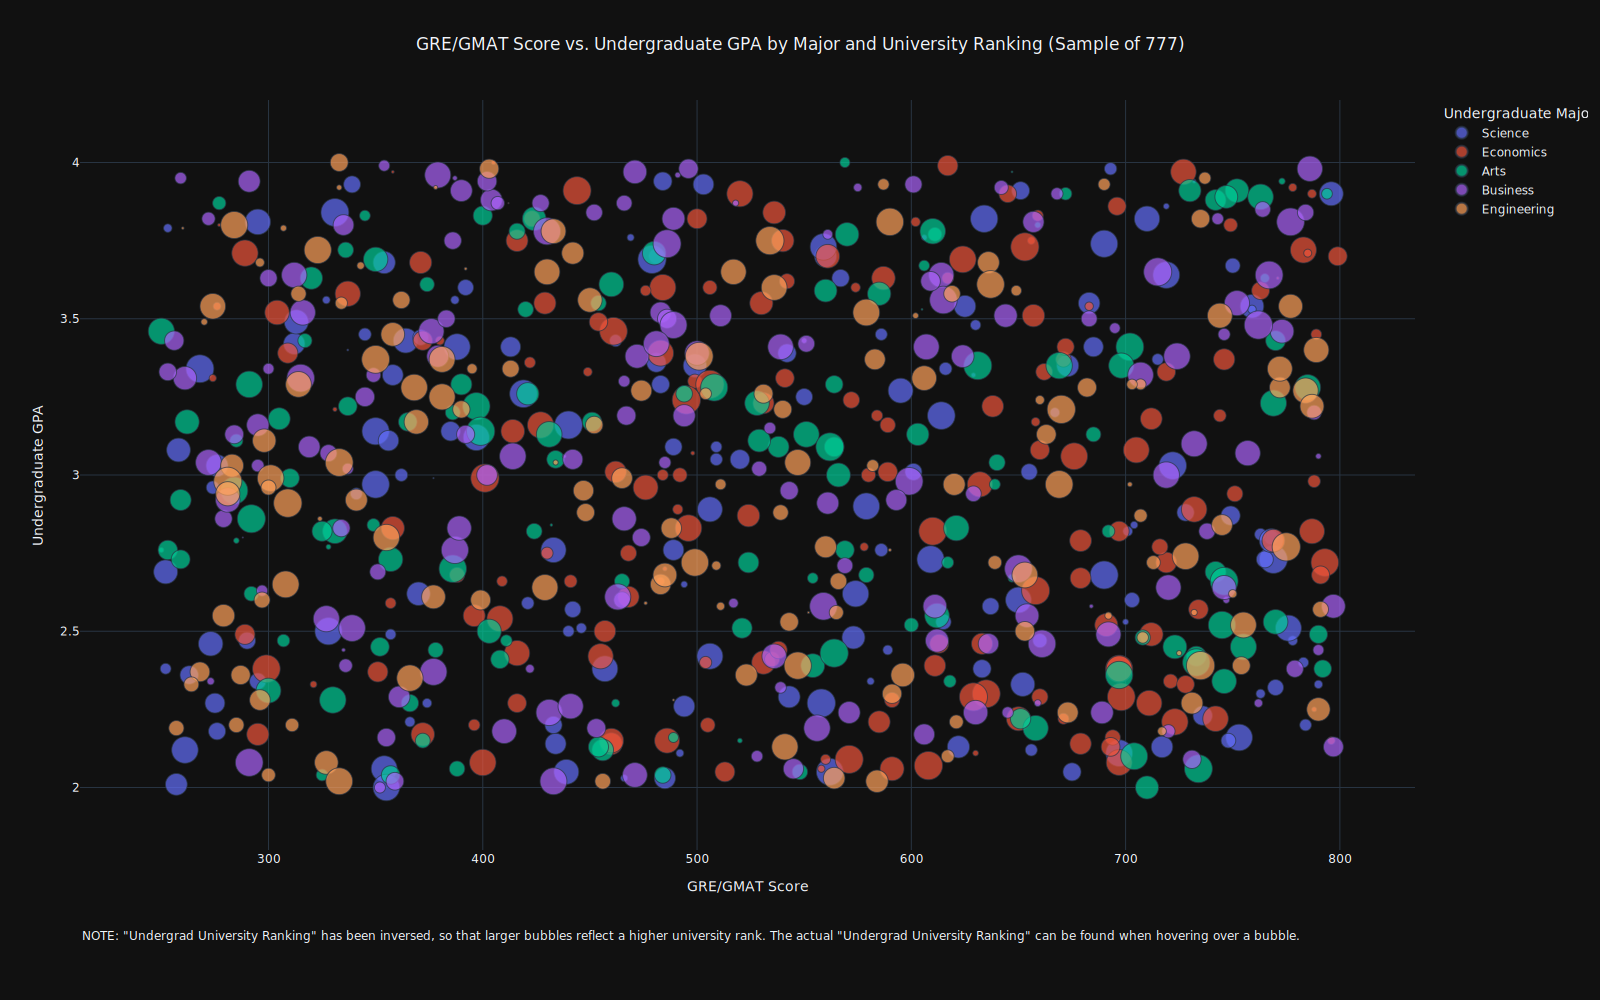

In [33]:
# sampled scatterplot
mba_sample777 = mba_df.sample(n=777, random_state=33)

max_uurank = mba_sample777['Undergrad University Ranking'].max()
mba_sample777['Undergrad University Ranking Inversed'] = max_uurank - mba_sample777['Undergrad University Ranking']

fig = px.scatter(
    mba_sample777,
    x='GRE/GMAT Score',
    y='Undergraduate GPA',
    size='Undergrad University Ranking Inversed',
    color='Undergraduate Major',
    title='GRE/GMAT Score vs. Undergraduate GPA by Major and University Ranking (Sample of 777)',
    labels={
        'GRE/GMAT Score': 'GRE/GMAT Score',
        'Undergraduate GPA': 'Undergraduate GPA'
    },
    hover_name='Undergraduate Major',
    hover_data=['Undergrad University Ranking']
)

fig.add_annotation(
    text='NOTE: "Undergrad University Ranking" has been inversed, so that larger bubbles reflect a higher university rank. The actual "Undergrad University Ranking" can be found when hovering over a bubble.',
    align='left',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=0,
    y=-0.1,
    xanchor='left',
    yanchor='top')

fig.update_layout(
    yaxis_range=[1.8, 4.2],
    width=1600,
    height=1000,
    margin=dict(b=150),
    title_x=0.5)

fig.show()

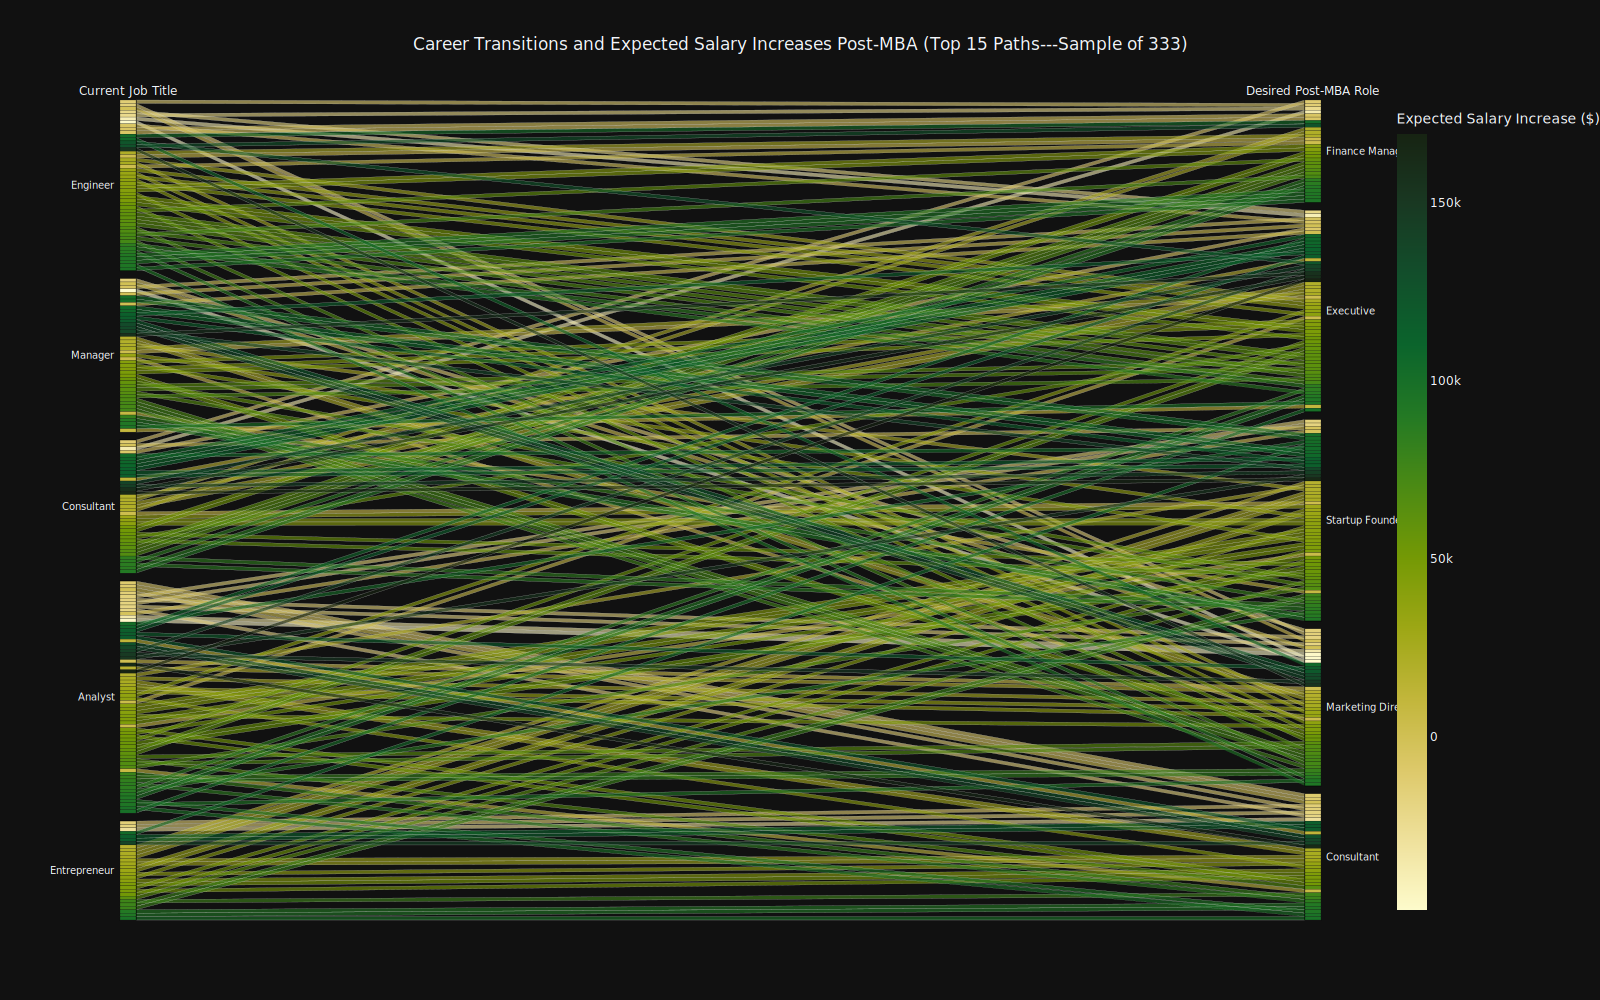

In [34]:
# sampled category changes plot
mba_sample333 = mba_df.sample(n=333, random_state=33)

mba_sample333['Salary Increase'] = mba_sample333['Expected Post-MBA Salary'] - mba_sample333['Annual Salary (Before MBA)']

top_paths = mba_sample333.groupby(['Current Job Title', 'Desired Post-MBA Role']).size().nlargest(15).reset_index()
top_paths_df = pd.merge(mba_sample333, top_paths, on=['Current Job Title', 'Desired Post-MBA Role'])

fig = px.parallel_categories(
    top_paths_df,
    dimensions=['Current Job Title', 'Desired Post-MBA Role'],
    color='Salary Increase',
    color_continuous_scale=px.colors.sequential.speed,
    labels={
        'Current Job Title': 'Current Job Title',
        'Desired Post-MBA Role': 'Desired Post-MBA Role',
        'Salary Increase': 'Expected Salary Increase ($)'
        },
    title='Career Transitions and Expected Salary Increases Post-MBA (Top 15 Paths---Sample of 333)'
    )


fig.update_layout(
    width=1600,
    height=1000,
    title_x=0.5
    )

fig.show()

#### The Value of Sampling
###### =====================================================================
- Average Salary Change (of population): $55154.82

- Average Salary Change (of sample): $53078.15

- Percent Difference Between Population and Sample: 0.04%

- Research.com puts the average salary change for an MBA at about $50000.00 in 2026

- [source]( https://research.com/degrees/top-online-mba-programs-without-work-experience-requirements#:~:text=The%20median%20base%20starting%20salary%20for%20recent,what%20many%20business%20master's%20(non%2DMBA)%20degrees%20pay.)
###### =====================================================================